# Data Augmentation

Uno de los principales obstáculos que se encuentran al intentar hallar la major solución al problema de clasificación, es la escasez de datos para el entrenamiento de los modelos.

Este notebook tiene como objetivo implementar y comparar los resultados obtenidos implementando técnicas de Data Augmentation para crear datos sintéticos y poder operar sobre un mayor volumen de datos.

In [1]:
# Estructuras de datos
import pandas as pd
import numpy as np
# Cargar los datos
from Modelos.data_and_submissions import *
# Métodos para los entrenamientos con CV
from Modelos.train_cv_methods import *

# Preparación de los datos

In [2]:
X_train, X_test, y_train, y_test, test_kaggle = load_data(True)
print("Tamaño del dataset de train:", X_train.shape)
print("Tamaño del dataset de test:", X_test.shape)

Tamaño del dataset de train: (68, 410)
Tamaño del dataset de test: (18, 410)


In [3]:
from sklearn.model_selection import train_test_split

def data_partition(data_augmented):
    X = data_augmented.iloc[:, 1:]
    Y = data_augmented.iloc[:, 0]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    return (X_train, X_test, y_train, y_test)

In [4]:
labels = pd.concat((y_train, y_test), axis=0)
features = pd.concat((X_train, X_test), axis=0)
features_tot = pd.concat((features, test_kaggle), axis=0)
print(features_tot.shape)

(119834, 410)


In [5]:
data = pd.concat((labels, features), axis=1)
data.head(10)

,Class,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
83,1,0.435160,0.225050,0.057172,-0.353480,0.447420,0.183180,0.122420,0.024561,0.404830,...,0.314668,-0.114078,-0.476524,-0.556896,0.505738,0.873278,0.040048,0.211690,0.536933,-0.424864
40,0,0.468280,0.108890,0.072178,0.002432,0.266450,0.350770,-0.210100,-0.089635,-0.140530,...,1.200450,1.817908,-0.299583,0.740836,1.491966,0.993555,-0.043188,0.564047,-0.916360,2.771659
60,0,0.137060,-0.188670,-0.160220,-0.152680,0.143570,0.142780,0.349660,-0.046245,-0.133690,...,-0.922012,-0.197890,1.585873,-0.056353,0.806093,-1.517281,1.672678,-0.376343,-0.061299,-0.945018
45,1,-0.174850,-0.119840,-0.366770,-0.354050,0.065508,-0.085309,-0.295600,0.311750,-0.013669,...,1.200334,0.313340,0.287729,-0.370420,0.224179,1.149330,1.842975,1.458239,0.729352,0.522059
73,1,-0.020630,0.250100,0.210830,0.423430,0.263870,0.298310,-0.088201,0.081132,-0.025001,...,-0.266496,-1.527078,-1.028776,0.437655,-0.938700,0.215549,-0.575946,0.804762,1.351451,0.619411
34,0,0.037074,-0.313110,-0.702080,-0.626550,-0.490060,-0.432500,-0.538550,0.023721,0.198530,...,0.969872,0.470231,-0.319118,-0.160328,0.632695,-1.015545,-0.633930,0.683149,0.720507,1.369418
20,0,0.328300,0.189330,0.027821,0.312910,0.245270,-0.226630,-0.130830,0.077108,-0.046652,...,-0.774058,1.739382,-1.845892,-1.522856,-1.344479,0.008769,0.898490,-0.164422,-0.050235,1.367143
10,1,0.124670,-0.049878,-0.130660,-0.141850,-0.148490,-0.085769,-0.127710,-0.312300,-0.136070,...,-0.897078,0.359318,-0.435161,-0.541126,0.363668,-0.545821,-0.868450,0.367415,-0.038803,1.003364
70,0,0.314770,0.295030,0.002139,0.274070,0.396880,0.078688,0.127860,0.011281,0.126330,...,-0.626300,-0.241099,-0.354035,-0.405403,-0.544734,-0.164949,0.659083,-0.868930,-0.530455,-0.722450
12,1,-0.128630,-0.290760,-0.505190,-0.554770,-0.275930,-0.026265,-0.418280,-0.527620,-0.381970,...,0.623423,0.509388,0.728753,-0.151419,1.698903,0.460504,-0.599519,1.229305,0.998584,0.043127


# Random noise

**Precisión de un modelo de Random Forest sobre el conjunto original de datos**

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [7]:
model_RF = RandomForestClassifier(random_state=0)
param_grid_RF = {
    "n_estimators": [100, 250, 500, 750, 1000],
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 15, 20]
}

no_data_aug = train_GridSearchCV(model_RF, param_grid_RF, X_train, X_test, y_train, y_test)
top_acc = top_acc_GridSearchCV(no_data_aug["mean_test_score"])
models_same_acc_GridSearchCV(no_data_aug, top_acc)

[{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 750},
 {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 750},
 {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 750},
 {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 750}]

In [7]:
# Definir y entrenar el modelo
no_data_aug_opt = RandomForestClassifier(criterion="entropy", max_depth=20, n_estimators=750, random_state=0)  
no_data_aug_opt.fit(X_train, y_train)

# Predicción en partición de test
y_pred_no_data_aug = no_data_aug_opt.predict(X_test)

# Precisión en partición de test
acc_no_data_aug = accuracy_score(y_test, y_pred_no_data_aug)
print("Accuracy: {:0.2f}%".format(acc_no_data_aug * 100))

Accuracy: 83.33%


In [35]:
y_pred_no_data_aug = no_data_aug_opt.predict(test_kaggle)

create_submission(y_pred_no_data_aug, "RF_no_DataAugmentation", True)

(119748, 2)


### Ruido gaussiano

Una primera prueba de introducción de ruido artificial se basará en añadir a los datos originales, valores (ruido) que se tomarán de una distribución gaussiana de media = 0 y desviación típica = 10% del rango de valores para cada variable.

In [8]:
# Para cada variable en el conjunto de datos, calculamos la desviación típica que usaremos (10% del intervalo)
max_per_var = features_tot.max(axis=0)
min_per_var = features_tot.min(axis=0)
std_per_var = (max_per_var - min_per_var) * 0.1
std_per_var.shape

(410,)

In [9]:
np.random.seed(0) # Reproducibilidad de resultados

def generate_noisy_sample_gaussian(original_sample, data=data, std_per_var=std_per_var):
    '''
    Función para generar valores de ruido a partir de una distribución gaussiana de media 0 y 
    desviación típica = 10% del rango de la variable
    '''
    noisy_sample = np.empty((len(std_per_var),))
    for j, var in enumerate(data.columns[1:]):
        noisy_sample[j] = original_sample[j] + np.random.normal(0, std_per_var[j])         
    return noisy_sample

# Para cada muestra conocida (y etiquetada), generaremos una muestra sintética con ruido
noisy_features_gaussian = np.empty(features.shape)
for i, sample in enumerate(features.to_numpy()):
    noisy_features_gaussian[i, :] = generate_noisy_sample_gaussian(sample)
    
# Volvemos a asignar las etiquetas correspondientes a cada fila
noisy_features_gaussian = np.c_[labels, noisy_features_gaussian]

noisy_data_gaussian = pd.concat([data, pd.DataFrame(noisy_features_gaussian, columns=data.columns)], axis=0)
# Shuffle de los datos con ruido
noisy_data_gaussian = noisy_data_gaussian.sample(frac=1, random_state=0)

print("Tamaño DataFrame original: {}".format(data.shape))
print("Tamaño DataFrame tras añadir el ruido: {}".format(noisy_data_gaussian.shape))
noisy_data_gaussian.head(10)

Tamaño DataFrame original: (86, 411)
Tamaño DataFrame tras añadir el ruido: (172, 411)


,Class,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
81,0.0,-0.148470,-0.401520,-0.474630,-0.532530,0.293510,-0.111720,-0.544720,0.240320,0.156540,...,0.512424,0.826910,-0.225792,0.369724,-0.565693,-0.045074,1.094329,-0.345906,-0.014453,0.567717
60,1.0,-0.232200,-0.042566,-0.791727,-0.772790,-0.346480,-0.117090,-0.509645,-0.336619,0.797302,...,-3.222112,-1.402231,1.920834,1.026937,-1.144009,-2.123258,-1.525115,-1.448959,-2.371252,-0.894455
67,1.0,0.820240,0.766600,0.588390,0.731570,0.763950,0.607150,0.612370,0.059279,0.729200,...,-2.465429,-0.935685,1.415247,-0.097483,0.073954,-2.566518,0.117317,-0.249365,-0.409918,-0.384427
4,1.0,-0.146210,-0.468630,-0.528800,-0.503810,-0.510520,-0.029113,-0.015192,0.360170,0.005944,...,1.342273,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440
39,0.0,0.262460,-0.303637,-0.227025,-0.235851,0.187904,-0.334999,0.293302,0.586997,0.407761,...,1.001576,0.855035,0.711041,-0.935583,0.473294,0.998934,-0.780473,-0.661480,2.054732,0.556554
14,0.0,-0.603918,-0.138133,-0.615962,-0.481932,-0.475437,-0.487702,-0.444205,-0.522006,-0.332678,...,-1.920996,-1.332419,0.839660,0.103529,1.004458,-3.103754,1.742597,-1.272035,-0.018540,1.237611
10,1.0,0.124670,-0.049878,-0.130660,-0.141850,-0.148490,-0.085769,-0.127710,-0.312300,-0.136070,...,-0.897078,0.359318,-0.435161,-0.541126,0.363668,-0.545821,-0.868450,0.367415,-0.038803,1.003364
69,1.0,0.119350,0.115388,0.071737,0.300453,0.223938,-0.018287,0.282171,0.039545,-0.361698,...,0.991947,-2.944841,1.107726,2.932836,1.460491,0.621709,-2.899831,-0.278128,-1.450732,-2.987256
18,0.0,0.318331,0.094148,0.007068,-0.388997,0.378600,-0.188975,0.168999,0.799038,0.101366,...,1.370051,-1.407210,0.437209,0.150966,0.458162,0.662532,-1.468774,-0.648076,-1.144024,-0.057911
3,1.0,-0.013986,-0.050827,-0.481793,-0.077876,-0.149324,-0.301414,-0.158155,0.343952,-0.092545,...,1.305155,0.150132,0.607371,-0.224237,0.018921,0.976853,1.183815,1.897722,0.304188,-0.171216


Precisión del modelo:

In [10]:
(X_train_gaussian, X_test_gaussian, y_train_gaussian, y_test_gaussian) = data_partition(noisy_data_gaussian)

In [12]:
data_aug_gaussian = train_GridSearchCV(model_RF, param_grid_RF, X_train_gaussian, X_test_gaussian, 
                                       y_train_gaussian, y_test_gaussian)
top_acc = top_acc_GridSearchCV(data_aug_gaussian["mean_test_score"])
models_same_acc_GridSearchCV(data_aug_gaussian, top_acc)

[{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 250}]

In [11]:
# Definir y entrenar el modelo
data_aug_gaussian_opt = RandomForestClassifier(criterion="entropy", max_depth=5, n_estimators=250, random_state=0)  
data_aug_gaussian_opt.fit(X_train_gaussian, y_train_gaussian)

# Predicción en partición de test
y_pred_data_aug_gaussian = data_aug_gaussian_opt.predict(X_test_gaussian)

# Precisión en partición de test
acc_data_aug_gaussian = accuracy_score(y_test_gaussian, y_pred_data_aug_gaussian)
print("Accuracy: {:0.2f}%".format(acc_data_aug_gaussian * 100))

Accuracy: 85.71%


In [36]:
y_pred_data_aug_gaussian = data_aug_gaussian_opt.predict(test_kaggle)

create_submission(y_pred_data_aug_gaussian, "RF_DataAugmentation_GaussianI", True)

(119748, 2)


Vamos a modificar ahora el método, de modo que los valores generados de ruido se tomen de una distribución gaussiana de media = 0 y desviación típica = 10% del rango de la diferencia entre la media de las variables para pacientes con esquizofrenia y la media de las variables de los individuos de control.

La motivación para introducir esta modificación es que podría ser que las distribuciones que definen cada variable sean diferentes cuando se considera a un individuo sano (etiqueta 0) y a un individuo enfermo (etiqueta 1). Si estas distribuciones están lo suficientemente cercanas, introducir un ruido aparentemente pequeño podría modificar una muestra originalmente correspondiente a una clase y generar otra de manera artificial con la misma etiqueta pero que se solapa con la distribución de la etiqueta opuesta.

In [12]:
control_group = data[data["Class"] == 0]
sick = data[data["Class"] == 0]

labels_control = control_group.iloc[:, 0]
features_control = np.array(control_group.iloc[:, 1:])
labels_sick = sick.iloc[:, 0]
features_sick = np.array(sick.iloc[:, 1:])

# Para cada variable en el conjunto de datos, calculamos la desviación típica que usaremos (10% del rango de la diferencia)
avg_per_var_control = features_control.mean(axis=0)
avg_per_var_sick = features_sick.mean(axis=0)
std_per_var = abs((avg_per_var_control - avg_per_var_sick)) * 0.1

In [13]:
np.random.seed(0) # Reproducibilidad de resultados

def generate_noisy_sample_gaussian2(original_sample, data=data, std_per_var=std_per_var):
    '''
    Función para generar valores de ruido a partir de una distribución gaussiana de media 0 y 
    desviación típica = 10% de la diferencia entre la media de la variable para cada clase
    '''
    noisy_sample = np.empty((len(std_per_var),))
    for j, var in enumerate(data.columns[1:]):
        noisy_sample[j] = original_sample[j] + np.random.normal(0, std_per_var[j])         
    return noisy_sample

# Para cada muestra conocida (y etiquetada), generaremos una muestra sintética con ruido
noisy_features_gaussian_2 = np.empty(features.shape)
for i, sample in enumerate(features.to_numpy()):
    noisy_features_gaussian_2[i, :] = generate_noisy_sample_gaussian2(sample)
    
# Volvemos a asignar las etiquetas correspondientes a cada fila
noisy_features_gaussian_2 = np.c_[labels, noisy_features_gaussian_2]

noisy_data_gaussian_2 = pd.concat([data, pd.DataFrame(noisy_features_gaussian_2, columns=data.columns)], axis=0)
# Shuffle de los datos con ruido
noisy_data_gaussian_2 = noisy_data_gaussian_2.sample(frac=1, random_state=0)

print("Tamaño DataFrame original: {}".format(data.shape))
print("Tamaño DataFrame tras añadir el ruido: {}".format(noisy_data_gaussian_2.shape))
noisy_data_gaussian_2.head(10)

Tamaño DataFrame original: (86, 411)
Tamaño DataFrame tras añadir el ruido: (172, 411)


,Class,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
81,0.0,-0.148470,-0.401520,-0.474630,-0.532530,0.293510,-0.111720,-0.544720,0.240320,0.156540,...,0.512424,0.826910,-0.225792,0.369724,-0.565693,-0.045074,1.094329,-0.345906,-0.014453,0.567717
60,1.0,-0.343140,0.020893,-0.547010,-0.652910,-0.226870,-0.354650,-0.630850,-0.189460,0.704020,...,-3.424498,-1.512935,1.480432,-0.012000,-1.151279,-2.123389,-0.962200,-0.524886,-2.310918,-1.740839
67,1.0,0.820240,0.766600,0.588390,0.731570,0.763950,0.607150,0.612370,0.059279,0.729200,...,-2.465429,-0.935685,1.415247,-0.097483,0.073954,-2.566518,0.117317,-0.249365,-0.409918,-0.384427
4,1.0,-0.146210,-0.468630,-0.528800,-0.503810,-0.510520,-0.029113,-0.015192,0.360170,0.005944,...,1.342273,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440
39,0.0,0.026362,-0.196510,-0.245280,-0.083840,0.304210,-0.180270,-0.008647,0.384610,0.300520,...,0.464108,1.135537,-0.256829,0.222902,0.528734,1.098908,-1.239779,-0.421480,1.130700,0.325227
14,0.0,-0.391350,-0.284360,-0.655090,-0.645960,-0.241020,-0.352420,-0.480940,-0.393730,-0.277160,...,-2.180108,-0.404150,0.358206,0.285097,0.955665,-3.015051,0.024974,-1.158544,-0.694036,-0.540947
10,1.0,0.124670,-0.049878,-0.130660,-0.141850,-0.148490,-0.085769,-0.127710,-0.312300,-0.136070,...,-0.897078,0.359318,-0.435161,-0.541126,0.363668,-0.545821,-0.868450,0.367415,-0.038803,1.003364
69,1.0,0.319650,0.099134,0.010361,0.004176,0.120010,0.088958,0.171350,-0.117730,-0.263870,...,1.240290,-2.316457,0.115988,1.992077,1.094181,0.362267,-1.395818,-0.647623,-0.699748,-2.677100
18,0.0,0.263490,0.022323,0.043017,-0.367170,0.300860,-0.016165,0.100220,0.370830,0.123080,...,0.781677,-0.535058,0.034981,-0.853332,0.965745,1.067908,-0.563230,-1.104692,-1.118982,-0.037143
3,1.0,-0.174850,-0.119840,-0.366770,-0.354050,0.065508,-0.085309,-0.295600,0.311750,-0.013669,...,1.200334,0.313340,0.287729,-0.370420,0.224179,1.149330,1.842975,1.458239,0.729352,0.522059


In [14]:
(X_train_gaussian2, X_test_gaussian2, y_train_gaussian2, y_test_gaussian2) = data_partition(noisy_data_gaussian_2)

In [17]:
data_aug_gaussian2 = train_GridSearchCV(model_RF, param_grid_RF, X_train_gaussian2, X_test_gaussian2, 
                                        y_train_gaussian2, y_test_gaussian2)
top_acc = top_acc_GridSearchCV(data_aug_gaussian2["mean_test_score"])
models_same_acc_GridSearchCV(data_aug_gaussian2, top_acc)

[{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 500},
 {'criterion': 'gini', 'max_depth': 15, 'n_estimators': 500},
 {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 500}]

In [15]:
# Definir y entrenar el modelo
data_aug_gaussian_opt2 = RandomForestClassifier(criterion="gini", max_depth=20, n_estimators=500, random_state=0)  
data_aug_gaussian_opt2.fit(X_train_gaussian2, y_train_gaussian2)

# Predicción en partición de test
y_pred_data_aug_gaussian2 = data_aug_gaussian_opt2.predict(X_test_gaussian2)

# Precisión en partición de test
acc_data_aug_gaussian2 = accuracy_score(y_test_gaussian2, y_pred_data_aug_gaussian2)
print("Accuracy: {:0.2f}%".format(acc_data_aug_gaussian2 * 100))

Accuracy: 88.57%


In [38]:
y_pred_data_aug_gaussian2 = data_aug_gaussian_opt2.predict(test_kaggle)

create_submission(y_pred_data_aug_gaussian2, "RF_DataAugmentation_GaussianII", True)

(119748, 2)


### Ruido uniforme

In [16]:
avg_per_var = features_tot.mean(axis=0)

In [17]:
np.random.seed(0) # Reproducibilidad de resultados

def generate_noisy_sample_uniform(original_sample, data=data, std_per_var=std_per_var, avg_per_var=avg_per_var):
    '''
    Función para generar valores de ruido a partir de una distribución uniforme
    '''
    noisy_sample = np.empty((len(std_per_var),))
    for j, var in enumerate(data.columns[1:]):
        noisy_sample[j] = original_sample[j] + np.random.uniform(avg_per_var[j]-std_per_var[j], avg_per_var[j]+std_per_var[j])         
    return noisy_sample

# Para cada muestra conocida (y etiquetada), generaremos una muestra sintética con ruido
noisy_features_uniform = np.empty(features.shape)
for i, sample in enumerate(features.to_numpy()):
    noisy_features_uniform[i, :] = generate_noisy_sample_uniform(sample)
    
# Volvemos a asignar las etiquetas correspondientes a cada fila
noisy_features_uniform = np.c_[labels, noisy_features_uniform]

noisy_data_uniform = pd.concat([data, pd.DataFrame(noisy_features_uniform, columns=data.columns)], axis=0)
# Shuffle de los datos con ruido
noisy_data_uniform = noisy_data_uniform.sample(frac=1, random_state=0)

print("Tamaño DataFrame original: {}".format(data.shape))
print("Tamaño DataFrame tras añadir el ruido: {}".format(noisy_data_uniform.shape))
noisy_data_uniform.head(10)

Tamaño DataFrame original: (86, 411)
Tamaño DataFrame tras añadir el ruido: (172, 411)


,Class,FNC1,FNC2,FNC3,FNC4,FNC5,FNC6,FNC7,FNC8,FNC9,...,SBM_map55,SBM_map61,SBM_map64,SBM_map67,SBM_map69,SBM_map71,SBM_map72,SBM_map73,SBM_map74,SBM_map75
81,0.0,-0.148470,-0.401520,-0.474630,-0.532530,0.293510,-0.111720,-0.544720,0.240320,0.156540,...,0.512424,0.826910,-0.225792,0.369724,-0.565693,-0.045074,1.094329,-0.345906,-0.014453,0.567717
60,1.0,-0.120222,0.143325,-0.607460,-0.668581,-0.043226,-0.299202,-0.731040,-0.240142,0.768622,...,-3.499343,-1.440684,1.418062,-0.112408,-1.172020,-1.980269,-0.910399,-0.415231,-2.311371,-1.608504
67,1.0,0.820240,0.766600,0.588390,0.731570,0.763950,0.607150,0.612370,0.059279,0.729200,...,-2.465429,-0.935685,1.415247,-0.097483,0.073954,-2.566518,0.117317,-0.249365,-0.409918,-0.384427
4,1.0,-0.146210,-0.468630,-0.528800,-0.503810,-0.510520,-0.029113,-0.015192,0.360170,0.005944,...,1.342273,-0.978412,0.158492,0.889753,0.795368,0.738788,0.475415,2.340384,2.516038,-0.551440
39,0.0,0.249280,-0.074078,-0.305730,-0.099511,0.487854,-0.124822,-0.108838,0.333928,0.365122,...,0.389263,1.207788,-0.319200,0.122495,0.507993,1.242028,-1.187978,-0.311825,1.130247,0.457562
14,0.0,-0.168432,-0.161928,-0.715540,-0.661631,-0.057376,-0.296972,-0.581130,-0.444412,-0.212558,...,-2.254953,-0.331899,0.295836,0.184689,0.934924,-2.871931,0.076776,-1.048889,-0.694488,-0.408612
10,1.0,0.124670,-0.049878,-0.130660,-0.141850,-0.148490,-0.085769,-0.127710,-0.312300,-0.136070,...,-0.897078,0.359318,-0.435161,-0.541126,0.363668,-0.545821,-0.868450,0.367415,-0.038803,1.003364
69,1.0,0.542568,0.221566,-0.050089,-0.011495,0.303654,0.144406,0.071160,-0.168412,-0.199268,...,1.165445,-2.244207,0.053618,1.891669,1.073441,0.505387,-1.344017,-0.537968,-0.700200,-2.544765
18,0.0,0.486408,0.144755,-0.017433,-0.382841,0.484504,0.039283,0.000030,0.320148,0.187682,...,0.706832,-0.462807,-0.027389,-0.953739,0.945004,1.211029,-0.511429,-0.995037,-1.119434,0.095193
3,1.0,0.048068,0.002592,-0.427220,-0.369721,0.249152,-0.029861,-0.395790,0.261068,0.050933,...,1.125489,0.385591,0.225359,-0.470828,0.203439,1.292451,1.894776,1.567895,0.728900,0.654394


In [18]:
(X_train_uniform, X_test_uniform, y_train_uniform, y_test_uniform) = data_partition(noisy_data_uniform)

In [22]:
data_aug_uniform = train_GridSearchCV(model_RF, param_grid_RF, X_train_uniform, X_test_uniform, y_train_uniform, y_test_uniform)
top_acc = top_acc_GridSearchCV(data_aug_uniform["mean_test_score"])
models_same_acc_GridSearchCV(data_aug_uniform, top_acc)

[{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 1000},
 {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 1000},
 {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 1000},
 {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 1000}]

In [19]:
# Definir y entrenar el modelo
data_aug_uniform_opt = RandomForestClassifier(criterion="entropy", max_depth=20, n_estimators=1000, random_state=0)  
data_aug_uniform_opt.fit(X_train_uniform, y_train_uniform)

# Predicción en partición de test
y_pred_data_aug_uniform = data_aug_uniform_opt.predict(X_test_uniform)

# Precisión en partición de test
acc_data_aug_uniform = accuracy_score(y_test_uniform, y_pred_data_aug_uniform)
print("Accuracy: {:0.2f}%".format(acc_data_aug_uniform * 100))

Accuracy: 85.71%


In [39]:
y_pred_data_aug_uniform = data_aug_uniform_opt.predict(test_kaggle)

create_submission(y_pred_data_aug_uniform, "RF_DataAugmentation_Uniform", True)

(119748, 2)


# Autoencoder

Otra posibilidad para hacer Data Augmentation es, dado que se dispone de un gran volumen de datos no etiquetados, obtener una estimación lo más acertada posible de las etiquetas a las que estarían asociados estos datos. En este caso, podríamos plantearnos repetir algún entrenamiento, esta vez sobre un conjunto de datos mucho mayor.

El modelo en base al cual vamos a generar estas predicciones va a ser el encoder ya visto anteriormente. Ya que como se ha explicado, se genera a partir de una red autoencoder que ha entrenado sobre el conjunto de datos completo que queremos etiquetar aquí y posteriormente ha adaptado sus pesos en la parte encoder al problema de clasificación que nos interesa aquí.

In [24]:
import tensorflow as tf
import keras
from keras import layers, models, optimizers, callbacks, backend, preprocessing

In [25]:
encoder = models.load_model("Modelos/encoder.h5")

In [63]:
np.random.seed(1)

args = np.random.choice(a=np.arange(0, test_kaggle.shape[0]), size=10000, replace=False)
test_kaggle_reduc = test_kaggle.iloc[args, :]

test_kaggle_reduc.shape

(10000, 410)

In [64]:
y_test_kaggle_reduc = encoder.predict(test_kaggle_reduc)

labels_tot = np.concatenate((np.reshape(y_train.to_numpy(), (68, 1)), y_test_kaggle_reduc), axis=0)
labels_tot.shape

(10068, 1)

In [65]:
features_tot = np.concatenate((X_train, test_kaggle_reduc))
features_tot.shape

(10068, 410)

Vamos a repetir el entrenamiento con una de las configuraciones de Random Forest que ha alcanzado los mejores resultados.

Accuracy en ``y_test`` sin aumentar el conjunto de datos con las etiquetas generadas por el encoder.

In [28]:
# Definir y entrenar el modelo
no_data_aug_opt = RandomForestClassifier(criterion="entropy", max_depth=20, n_estimators=800, random_state=0)  
no_data_aug_opt.fit(X_train, y_train)

# Predicción en partición de test
y_pred_no_data_aug = no_data_aug_opt.predict(X_test)

# Precisión en partición de test
acc_no_data_aug2 = accuracy_score(y_test, y_pred_no_data_aug)
print("Accuracy: {:0.2f}%".format(acc_no_data_aug2 * 100))

Accuracy: 88.89%


Accuracy en ``y_test`` aumentando el conjunto de datos con las etiquetas generadas por el encoder.

In [66]:
# Definir y entrenar el modelo
rf_encoder1 = RandomForestClassifier(criterion="entropy", max_depth=20, n_estimators=800, random_state=0)  
rf_encoder1.fit(features_tot, np.around(labels_tot, decimals=0).ravel())

# Predicción en partición de test
y_pred_encoder1 = rf_encoder1.predict(X_test.to_numpy())

# Precisión en partición de test
acc_encoder1 = accuracy_score(y_test, y_pred_encoder1)
print("Accuracy: {:0.2f}%".format(acc_encoder1 * 100))

Accuracy: 44.44%


**Prueba con el segundo autoencoder entrenado**

In [55]:
encoder3 = models.load_model("Modelos/encoder3.h5")

In [67]:
y_test_kaggle_reduc = encoder3.predict(test_kaggle_reduc)

labels_tot = np.concatenate((np.reshape(y_train.to_numpy(), (68, 1)), y_test_kaggle_reduc), axis=0)
labels_tot.shape

(10068, 1)

Accuracy en ``y_test`` aumentando el conjunto de datos con las etiquetas generadas por el encoder.

In [68]:
# Definir y entrenar el modelo
rf_encoder3 = RandomForestClassifier(criterion="entropy", max_depth=20, n_estimators=800, random_state=0)  
rf_encoder3.fit(features_tot, np.around(labels_tot, decimals=0).ravel())

# Predicción en partición de test
y_pred_encoder3 = rf_encoder3.predict(X_test.to_numpy())

# Precisión en partición de test
acc_encoder3 = accuracy_score(y_test, y_pred_encoder3)
print("Accuracy: {:0.2f}%".format(acc_encoder3 * 100))

Accuracy: 44.44%


# Comparación de resultados

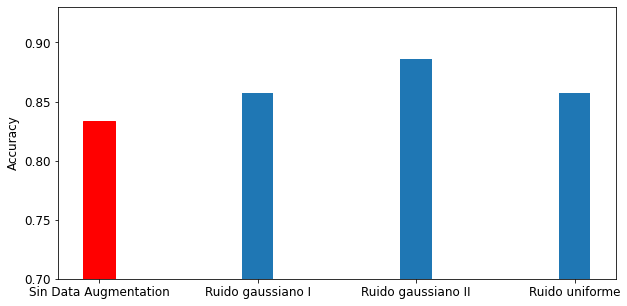

In [25]:
import matplotlib.pyplot as plt

results_acc = [acc_no_data_aug, acc_data_aug_gaussian, acc_data_aug_gaussian2, acc_data_aug_uniform]
xaxis = ["Sin Data Augmentation", "Ruido gaussiano I", "Ruido gaussiano II", "Ruido uniforme"]

plt.figure(figsize=(10, 5))
barlist = plt.bar(xaxis, results_acc, width=0.2)
barlist[0].set_color("r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(bottom=0.7)
plt.ylabel("Accuracy", fontsize=12)
plt.show()

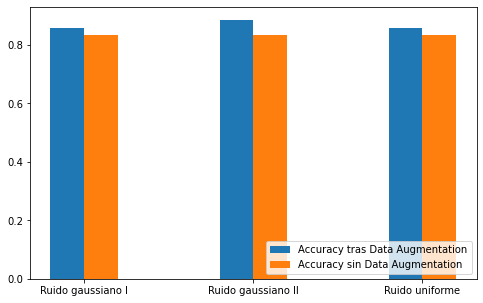

In [33]:
results_acc = [acc_data_aug_gaussian, acc_data_aug_gaussian2, acc_data_aug_uniform]
original_acc = [acc_no_data_aug]*3
xaxis = ["Ruido gaussiano I", "Ruido gaussiano II", "Ruido uniforme"]
x = np.arange(len(xaxis))

plt.figure(figsize=(8, 5))
plt.bar(x-0.1, results_acc, width=0.2, label="Accuracy tras Data Augmentation")
plt.bar(x+0.1, original_acc, width=0.2,  label="Accuracy sin Data Augmentation")
plt.xticks(range(0, len(xaxis)), xaxis, rotation=0)
plt.legend(loc="lower right")
plt.show()